In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jungle-fire/dataset/no_fire/download (9).jpg
/kaggle/input/jungle-fire/dataset/no_fire/images (2).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (3).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (8).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (7).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (28).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (5).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (6).jpg
/kaggle/input/jungle-fire/dataset/no_fire/images (1).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (1).jpg
/kaggle/input/jungle-fire/dataset/no_fire/images (3).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (2).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download (4).jpg
/kaggle/input/jungle-fire/dataset/no_fire/download.jpg
/kaggle/input/jungle-fire/dataset/no_fire/images.jpg
/kaggle/input/jungle-fire/dataset/fire/download (9).jpg
/kaggle/input/jungle-fire/dataset/fire/images (2).jpg
/kaggle/input/jungle

In [23]:
import os
print(os.listdir("/kaggle/input"))


['jungle-fire']


In [24]:
import os

dataset_dir = "/kaggle/input/jungle-fire"

for root, dirs, files in os.walk(dataset_dir):
    print(root, "->", dirs, len(files), "files")


/kaggle/input/jungle-fire -> ['dataset'] 0 files
/kaggle/input/jungle-fire/dataset -> ['no_fire', 'fire'] 0 files
/kaggle/input/jungle-fire/dataset/no_fire -> [] 15 files
/kaggle/input/jungle-fire/dataset/fire -> [] 66 files


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

# Dataset path
dataset_dir = "/kaggle/input/jungle-fire/dataset"

# Step 1: Data Generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)

# Step 2: Simple CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train Model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Step 4: Save Model
model.save('/kaggle/working/fire_model.h5')
print("✅ Model saved as fire_model.h5")

# Step 5: Download Link for Model
from IPython.display import FileLink
FileLink('/kaggle/working/fire_model.h5')


Found 65 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9010 - loss: 0.5556 - val_accuracy: 0.8125 - val_loss: 0.3697
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8126 - loss: 0.3948 - val_accuracy: 0.8125 - val_loss: 0.2276
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8105 - loss: 0.2746 - val_accuracy: 0.8125 - val_loss: 0.1807
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7943 - loss: 0.1843 - val_accuracy: 1.0000 - val_loss: 0.1531
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1190 - val_accuracy: 1.0000 - val_loss: 0.1358
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9633 - loss: 0.0859 - val_accuracy: 1.0000 - val_loss: 0.1355
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.1307 - val_accuracy: 1.0000 - val_loss: 0.1349
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/s

/kaggle/working/fire_model.h5

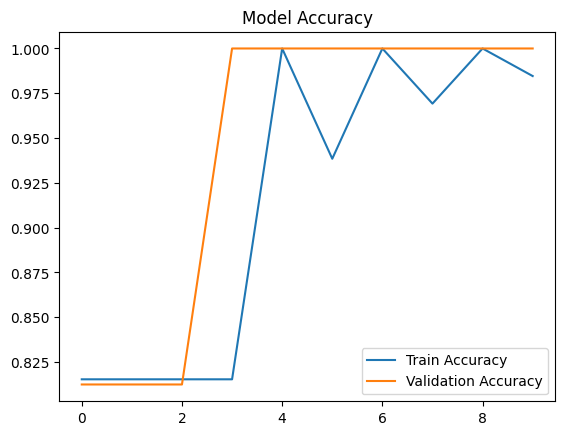

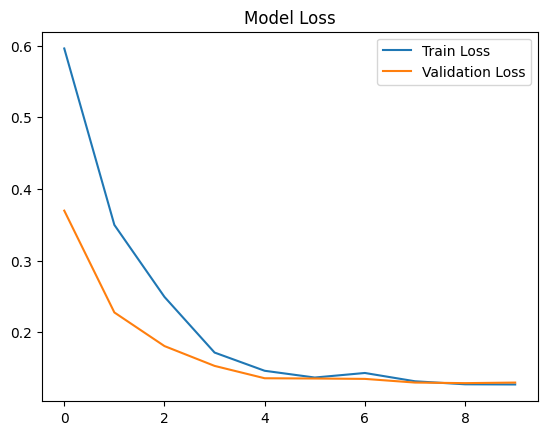

In [26]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [2]:
import shutil
import os

# --- Step 1: README bana lo ---
readme_text = """# Jungle Fire Detection Project

## Overview
Yeh project fire aur no_fire images ko classify karta hai CNN model ka use karke.

## Contents
- fire_model.h5  → Trained model file
- dataset/       → Original dataset (fire & no_fire)
- notebook.ipynb → Kaggle notebook file
- README.md      → Project description

## How to Use
1. fire_model.h5 ko load karo:
   from tensorflow.keras.models import load_model
   model = load_model('fire_model.h5')

2. Image preprocess karke prediction lo.
"""

with open("/kaggle/working/README.md", "w") as f:
    f.write(readme_text)

# --- Step 2: Dataset copy kar lo working dir me ---
dataset_src = "/kaggle/input/jungle-fire/dataset"
dataset_dst = "/kaggle/working/dataset"
if not os.path.exists(dataset_dst):
    shutil.copytree(dataset_src, dataset_dst)

# --- Step 3: Model already /kaggle/working me hona chahiye ---
model_path = "/kaggle/working/fire_model.h5"
if not os.path.exists(model_path):
    raise FileNotFoundError("⚠️ Model file fire_model.h5 nahi mili!")

# --- Step 4: Zip bana do ---
zip_path = "/kaggle/working/jungle_fire_project"
shutil.make_archive(zip_path, 'zip', '/kaggle/working')

print("✅ Zip file ready:", zip_path + ".zip")
print("📥 Download from the Files sidebar (right side in Kaggle)")


FileNotFoundError: ⚠️ Model file fire_model.h5 nahi mili!

In [3]:
model.save("/kaggle/working/fire_model.h5")


NameError: name 'model' is not defined

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import FileLink

# --- Step 1: Dataset Path ---
dataset_dir = "/kaggle/input/jungle-fire/dataset"

print("📂 Dataset Structure:")
for root, dirs, files in os.walk(dataset_dir):
    print(root, "->", len(files), "files")

# --- Step 2: Data Generators ---
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)

# --- Step 3: Model ---
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Step 4: Train ---
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# --- Step 5: Save Model ---
model_path = "/kaggle/working/fire_model.h5"
model.save(model_path)
print(f"✅ Model saved at {model_path}")

# --- Step 6: Create ZIP ---
zip_path = "/kaggle/working/fire_project.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, arcname="fire_model.h5")
    # You can add more files if needed
print(f"📦 ZIP created at {zip_path}")

# --- Step 7: Download Link ---
FileLink(zip_path)


2025-08-15 09:57:35.355754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755251855.558771      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755251855.616481      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


📂 Dataset Structure:
/kaggle/input/jungle-fire/dataset -> 0 files
/kaggle/input/jungle-fire/dataset/no_fire -> 15 files
/kaggle/input/jungle-fire/dataset/fire -> 66 files
Found 65 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1755251868.776682      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755251868.777402      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1755251871.911894     109 service.cc:148] XLA service 0x7e59ac004fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755251871.913110     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755251871.913130     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755251872.192895     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.1250 - loss: 0.7650

I0000 00:00:1755251874.299913     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.5647 - loss: 0.6404 - val_accuracy: 0.8125 - val_loss: 0.4278
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8032 - loss: 0.4712 - val_accuracy: 0.8125 - val_loss: 0.2861
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8097 - loss: 0.3217 - val_accuracy: 0.8125 - val_loss: 0.2001
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7708 - loss: 0.2448 - val_accuracy: 0.8125 - val_loss: 0.1522
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8494 - loss: 0.1306 - val_accuracy: 0.8125 - val_loss: 0.1515
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9191 - loss: 0.1511 - val_accuracy: 1.0000 - val_loss: 0.1354
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9938 - loss: 0.1214 - val_accuracy: 1.0000 - val_loss: 0.1318
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.1417 - val_accuracy: 1.0000 - val_loss: 0.1361
Epoch 9/10

/kaggle/working/fire_project.zip